# Raw Cross-Val

In [ ]:
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

## Data

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
data = torch.tensor(iris.iloc[:,:4].values).float()
labels = torch.zeros(data.shape[0], dtype = torch.long)
labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## Split Dataset

In [ ]:
prop_train = .8
n_train = int(len(labels) * prop_train)

train_mask = torch.zeros(len(labels), dtype=torch.bool)
train_idxs = np.random.choice(range(1,len(labels)), n_train, replace=True)
train_mask[train_idxs] = True
train_mask

tensor([False,  True, False,  True,  True, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True, False,  True,
         True, False, False,  True, False, False,  True,  True, False,  True,
        False, False, False, False, False, False,  True, False, False,  True,
        False, False,  True,  True,  True,  True,  True, False,  True, False,
        False,  True,  True,  True, False, False, False, False,  True,  True,
         True,  True, False, False, False, False,  True, False,  True, False,
        False,  True, False,  True,  True, False,  True,  True, False, False,
         True,  True,  True,  True,  True, False, False,  True,  True, False,
         True,  True, False,  True,  True,  True, False, False,  True,  True,
         True,  True, False,  True, False, False,  True, False,  True,  True,
         True, False,  True, False,  True, False, False, False, 

In [ ]:
print('Total mean:')
print(torch.mean(labels.float()))

print('\nTrain mean:')
print(torch.mean(labels[train_mask].float()))

print('\nTest mean:')
print(torch.mean(labels[~train_mask].float()))

Total mean:
tensor(1.)

Train mean:
tensor(0.9643)

Test mean:
tensor(1.0455)


## Model

In [ ]:
ann = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 3)
)

ann

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=3, bias=True)
)

## Train

In [ ]:
num_epochs = 1000
losses = torch.zeros(num_epochs)
accuracies = torch.zeros(num_epochs)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ann.parameters(), lr = 1e-3)

for epoch in range(num_epochs):

  y_hat = ann(data[train_mask, :])

  loss = loss_fn(y_hat, labels[train_mask])
  losses[epoch] = loss
  accuracy = 100 * torch.mean(
      (torch.argmax(y_hat, axis=1) == labels[train_mask]).float()
   )
  accuracies[epoch] = accuracy

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 1.092695951461792
Epoch: 10, Loss: 1.0876281261444092
Epoch: 20, Loss: 1.0829252004623413
Epoch: 30, Loss: 1.0788896083831787
Epoch: 40, Loss: 1.075107216835022
Epoch: 50, Loss: 1.0714097023010254
Epoch: 60, Loss: 1.067753791809082
Epoch: 70, Loss: 1.0641837120056152
Epoch: 80, Loss: 1.0609569549560547
Epoch: 90, Loss: 1.0582973957061768
Epoch: 100, Loss: 1.055830478668213
Epoch: 110, Loss: 1.0534846782684326
Epoch: 120, Loss: 1.0511953830718994
Epoch: 130, Loss: 1.0489702224731445
Epoch: 140, Loss: 1.046747088432312
Epoch: 150, Loss: 1.0445194244384766
Epoch: 160, Loss: 1.0422967672348022
Epoch: 170, Loss: 1.040090799331665
Epoch: 180, Loss: 1.0379140377044678
Epoch: 190, Loss: 1.0357550382614136
Epoch: 200, Loss: 1.0336030721664429
Epoch: 210, Loss: 1.0314537286758423
Epoch: 220, Loss: 1.0293374061584473
Epoch: 230, Loss: 1.027217984199524
Epoch: 240, Loss: 1.0250964164733887
Epoch: 250, Loss: 1.023000717163086
Epoch: 260, Loss: 1.020913004875183
Epoch: 270, Loss: 1.0

## Prediction

In [ ]:
train_preds = ann(data[train_mask,:])
train_acc = 100 * torch.mean(
    (torch.argmax(train_preds, axis = 1) == labels[train_mask]).float()
)

test_preds = ann(data[~train_mask,:])
test_acc = 100 * torch.mean(
    (torch.argmax(test_preds, axis=1) == labels[~train_mask]).float()
)

print(f'Train Accuracy: {train_acc:2f}')
print(f'Test Accuracy: {test_acc:2f}')

Train Accuracy: 67.857140
Test Accuracy: 65.151512


## Viz

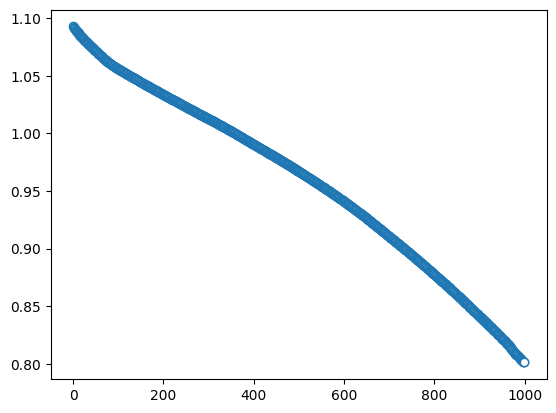

In [ ]:
plt.plot(losses.detach(), 'o', markerfacecolor='white')

# SciKit Cross-Val

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data

In [ ]:
iris = sns.load_dataset('iris')
data = torch.tensor(iris.iloc[:,:4].values, dtype = torch.float)

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

data[:10], labels

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [4.6000, 3.4000, 1.4000, 0.3000],
         [5.0000, 3.4000, 1.5000, 0.2000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [4.9000, 3.1000, 1.5000, 0.1000]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2]))

## Split Dataset

In [ ]:
fake_data = np.tile(np.array([1,2,3,4]), (10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fake_data

array([[ 11,  12,  13,  14],
       [ 21,  22,  23,  24],
       [ 31,  32,  33,  34],
       [ 41,  42,  43,  44],
       [ 51,  52,  53,  54],
       [ 61,  62,  63,  64],
       [ 71,  72,  73,  74],
       [ 81,  82,  83,  84],
       [ 91,  92,  93,  94],
       [101, 102, 103, 104]])

In [ ]:
fake_labels = np.arange(10)>4
fake_labels

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(fake_data, fake_labels, test_size = 0.2, train_size=.8)

print(train_data.shape)
print(test_data.shape)

(8, 4)
(2, 4)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

train_data.shape, test_data.shape

((8, 4), (2, 4))

## Model

In [ ]:
def model():
  ann = nn.Sequential(
      nn.Linear(4, 64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,16),
      nn.ReLU(),
      nn.Linear(16,3)
  )

  return ann

## Train

In [ ]:
def train(model, num_epochs, test_size):
  lr = 1e-3

  losses = torch.zeros(num_epochs)
  train_accuracies = torch.zeros(num_epochs)
  test_accuracies = torch.zeros(num_epochs)

  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size)

  for epoch in range(num_epochs):


    y_hat = model(X_train)

    loss = loss_fn(y_hat, y_train)
    losses[epoch] = loss

    # track train and test accuracies
    train_pred = model(X_train)
    train_acc = 100 * torch.mean(
        (torch.argmax(train_pred, axis = 1) == y_train).float()
    )
    train_accuracies[epoch] = train_acc

    test_pred = model(X_test)
    test_acc = 100 * torch.mean(
        (torch.argmax(test_pred, axis = 1) == y_test).float()
    )
    test_accuracies[epoch] = test_acc

    if epoch%10 == 0:
      print(f'Epoch: {epoch}, Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  return losses, train_accuracies, test_accuracies

## Prediction

## Test Model

In [ ]:
ann = model()
losses, train_accuracies, test_accuracies = train(model = ann, num_epochs = 3000, test_size = 0.2)

Epoch: 0, Loss: 1.1230474710464478
Epoch: 10, Loss: 1.1132328510284424
Epoch: 20, Loss: 1.1040512323379517
Epoch: 30, Loss: 1.0946112871170044
Epoch: 40, Loss: 1.0865691900253296
Epoch: 50, Loss: 1.0815309286117554
Epoch: 60, Loss: 1.0768663883209229
Epoch: 70, Loss: 1.0724796056747437
Epoch: 80, Loss: 1.0682975053787231
Epoch: 90, Loss: 1.0642950534820557
Epoch: 100, Loss: 1.0604604482650757
Epoch: 110, Loss: 1.056780457496643
Epoch: 120, Loss: 1.0532631874084473
Epoch: 130, Loss: 1.0498961210250854
Epoch: 140, Loss: 1.046701192855835
Epoch: 150, Loss: 1.0436890125274658
Epoch: 160, Loss: 1.0408962965011597
Epoch: 170, Loss: 1.0382709503173828
Epoch: 180, Loss: 1.0357590913772583
Epoch: 190, Loss: 1.033309817314148
Epoch: 200, Loss: 1.0309226512908936
Epoch: 210, Loss: 1.0285693407058716
Epoch: 220, Loss: 1.026252269744873
Epoch: 230, Loss: 1.0238456726074219
Epoch: 240, Loss: 1.021189570426941
Epoch: 250, Loss: 1.0185527801513672
Epoch: 260, Loss: 1.0160971879959106
Epoch: 270, Loss:

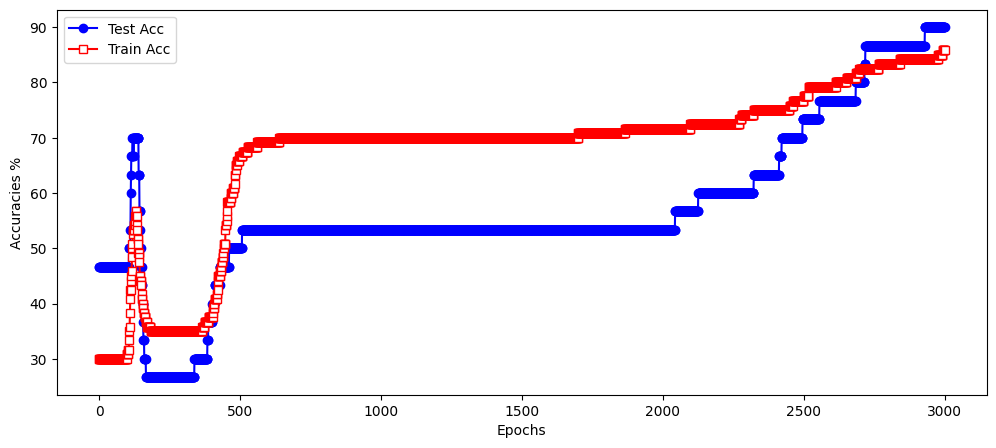

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test_accuracies, 'bo-', label='Test Acc')
plt.plot(train_accuracies, 'rs-', markerfacecolor='w', label='Train Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracies %')
plt.legend()
plt.show()

## Train Size Experiment

In [ ]:
test_sizes = np.linspace(.2,.9,10)

epochs_per_exp = 3000
experiment_train_accuracies = torch.zeros(len(test_sizes), epochs_per_exp)
experiment_test_accuracies = torch.zeros(len(test_sizes), epochs_per_exp)

for i, test_size in enumerate(test_sizes):
  ann = model()
  losses, train_accuracies, test_accuracies = train(model = ann, num_epochs = epochs_per_exp, test_size = test_sizes[i])

  experiment_train_accuracies[i, :] = train_accuracies
  experiment_test_accuracies[i, :] = test_accuracies

Epoch: 0, Loss: 1.1288528442382812
Epoch: 10, Loss: 1.1261107921600342
Epoch: 20, Loss: 1.123352289199829
Epoch: 30, Loss: 1.1206059455871582
Epoch: 40, Loss: 1.1179473400115967
Epoch: 50, Loss: 1.1154125928878784
Epoch: 60, Loss: 1.113291621208191
Epoch: 70, Loss: 1.111606240272522
Epoch: 80, Loss: 1.1100119352340698
Epoch: 90, Loss: 1.1084409952163696
Epoch: 100, Loss: 1.1068761348724365
Epoch: 110, Loss: 1.1053215265274048
Epoch: 120, Loss: 1.1037769317626953
Epoch: 130, Loss: 1.102243185043335
Epoch: 140, Loss: 1.1007235050201416
Epoch: 150, Loss: 1.099213719367981
Epoch: 160, Loss: 1.0977282524108887
Epoch: 170, Loss: 1.0962694883346558
Epoch: 180, Loss: 1.0948249101638794
Epoch: 190, Loss: 1.0933932065963745
Epoch: 200, Loss: 1.0919758081436157
Epoch: 210, Loss: 1.0905591249465942
Epoch: 220, Loss: 1.0891495943069458
Epoch: 230, Loss: 1.0877469778060913
Epoch: 240, Loss: 1.0863494873046875
Epoch: 250, Loss: 1.0849424600601196
Epoch: 260, Loss: 1.0835378170013428
Epoch: 270, Loss:

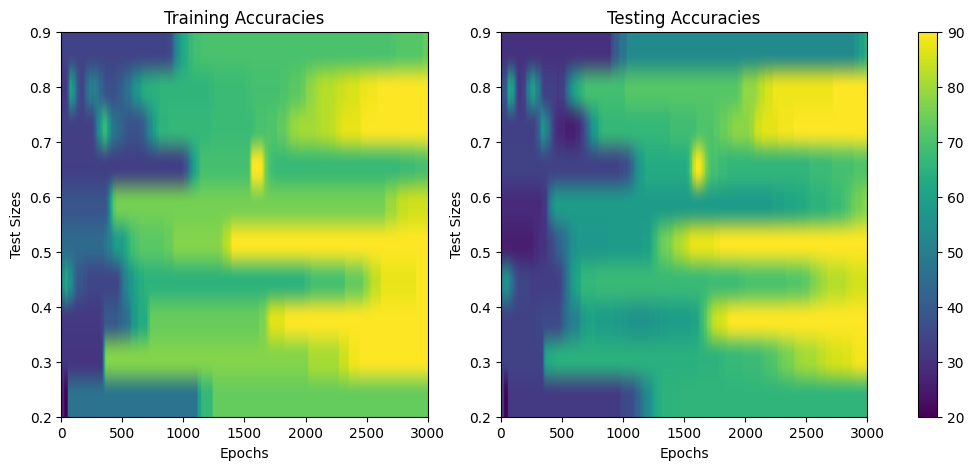

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))

im = ax[0].imshow(experiment_train_accuracies, aspect='auto', vmin = 20, vmax = 90, extent = [0, epochs_per_exp, test_sizes[0], test_sizes[-1]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Test Sizes')
ax[0].set_title('Training Accuracies')

im = ax[1].imshow(experiment_test_accuracies, aspect='auto', vmin=20, vmax = 90, extent = [0, epochs_per_exp, test_sizes[0], test_sizes[-1]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Test Sizes')
ax[1].set_title('Testing Accuracies')

fig.colorbar(im, ax=ax, location = 'right')

plt.show()

# DataLoader Cross-Val

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data

In [ ]:
iris = sns.load_dataset('iris')
data = torch.tensor(iris.iloc[:,:4].values, dtype=torch.float)
labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

## Split Dataset

### DataLoader intro

In [ ]:
fake_data = torch.tile(torch.arange(1,5), (10,1)) + torch.tile(10*torch.arange(1,11), (4,1)).T
fake_labels = torch.arange(10)>4
fake_data, fake_labels

(tensor([[ 11,  12,  13,  14],
         [ 21,  22,  23,  24],
         [ 31,  32,  33,  34],
         [ 41,  42,  43,  44],
         [ 51,  52,  53,  54],
         [ 61,  62,  63,  64],
         [ 71,  72,  73,  74],
         [ 81,  82,  83,  84],
         [ 91,  92,  93,  94],
         [101, 102, 103, 104]]),
 tensor([False, False, False, False, False,  True,  True,  True,  True,  True]))

In [ ]:
fake_data_ldr = DataLoader(fake_data, shuffle=True)
print(fake_data_ldr)
print(fake_data_ldr.batch_size)

1


In [ ]:
for i, sample in enumerate(fake_data_ldr):
  print(i, sample, sample.shape)

0 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
1 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
2 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
3 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
4 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
5 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
6 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])
7 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
8 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
9 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])


In [ ]:
fake_dataset = torch.utils.data.TensorDataset(torch.tensor(fake_data), torch.tensor(fake_labels))
print(fake_dataset,'\n')
print(type(fake_dataset))


<class 'torch.utils.data.dataset.TensorDataset'>


/tmp/ipython-input-1371381722.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  fake_dataset = torch.utils.data.TensorDataset(torch.tensor(fake_data), torch.tensor(fake_labels))


In [ ]:
fake_dataset.tensors

(tensor([[ 11,  12,  13,  14],
         [ 21,  22,  23,  24],
         [ 31,  32,  33,  34],
         [ 41,  42,  43,  44],
         [ 51,  52,  53,  54],
         [ 61,  62,  63,  64],
         [ 71,  72,  73,  74],
         [ 81,  82,  83,  84],
         [ 91,  92,  93,  94],
         [101, 102, 103, 104]]),
 tensor([False, False, False, False, False,  True,  True,  True,  True,  True]))

In [ ]:
fake_data_ldr = DataLoader(fake_dataset)
fake_data_ldr

In [ ]:
for data_, label in fake_data_ldr:
  print('Data: ', data_)
  print('Label: ', label)
  print('\n')

Data:  tensor([[11, 12, 13, 14]])
Label:  tensor([False])


Data:  tensor([[21, 22, 23, 24]])
Label:  tensor([False])


Data:  tensor([[31, 32, 33, 34]])
Label:  tensor([False])


Data:  tensor([[41, 42, 43, 44]])
Label:  tensor([False])


Data:  tensor([[51, 52, 53, 54]])
Label:  tensor([False])


Data:  tensor([[61, 62, 63, 64]])
Label:  tensor([True])


Data:  tensor([[71, 72, 73, 74]])
Label:  tensor([True])


Data:  tensor([[81, 82, 83, 84]])
Label:  tensor([True])


Data:  tensor([[91, 92, 93, 94]])
Label:  tensor([True])


Data:  tensor([[101, 102, 103, 104]])
Label:  tensor([True])




In [ ]:
# We use sci-kit to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(fake_data, fake_labels, test_size=.2)

# Then convert it into dataset
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

# Then convert it into dataloader
train_dataloader = DataLoader(train_dataset, batch_size = 4)
test_dataloader = DataLoader(test_dataset)

/tmp/ipython-input-2334186801.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
/tmp/ipython-input-2334186801.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(y_test))


In [ ]:
# Examine Dataloaders
print('TRAIN DATALOADER')
for batch, label in train_dataloader:
  print(batch, label, '\n')

print('TEST DATALOADER')
for batch, label in test_dataloader:
  print(batch, label, '\n')

TRAIN DATALOADER
tensor([[ 41,  42,  43,  44],
        [ 71,  72,  73,  74],
        [101, 102, 103, 104],
        [ 51,  52,  53,  54]]) tensor([False,  True,  True, False]) 

tensor([[61, 62, 63, 64],
        [11, 12, 13, 14],
        [31, 32, 33, 34],
        [91, 92, 93, 94]]) tensor([ True, False, False,  True]) 

TEST DATALOADER
tensor([[21, 22, 23, 24]]) tensor([False]) 

tensor([[81, 82, 83, 84]]) tensor([True]) 



### Back to data

In [ ]:
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

# Dataset
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

# DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0])

/tmp/ipython-input-1868032897.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
/tmp/ipython-input-1868032897.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(y_test))


In [ ]:
test_dataset.tensors[0].shape[0]

30

In [ ]:
for X, y in train_dataloader:
  print(X.shape, y.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


## Model

In [ ]:
!pip install sympy==1.12

In [ ]:
def model_arch():
  ann = nn.Sequential(
      nn.Linear(4, 64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.ReLU(),
      nn.Linear(64, 16),
      nn.ReLU(),
      nn.Linear(16, 4)
  )
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ann.parameters(), lr = 1e-3)

  return ann, loss_fn, optimizer

In [ ]:
def model_train(model, loss_fn, optimizer):
  num_epochs = 500

  train_accs = torch.zeros(num_epochs)
  test_accs = torch.zeros(num_epochs)

  for epoch in range(num_epochs):
      batch_accs = torch.zeros(len(train_dataloader))

      # Single batch iteration
      for i, (X, y) in enumerate(train_dataloader):

          y_hat = model(X)
          loss = loss_fn(y_hat, y)

          batch_acc = 100 * torch.mean(
              (torch.argmax(y_hat, axis = 1) == y).float()
          )
          batch_accs[i] = batch_acc

          if epoch % 50 == 0:
                print(f"[epoch {epoch:03d}] batch {i}: X{tuple(X.shape)} y{tuple(y.shape)} loss={loss.item():.4f}")


          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

      train_accs[epoch] = torch.mean(batch_accs)

      X_test, y_test = next(iter(test_dataloader))
      y_hat_test = model(X_test)
      test_acc = 100 * torch.mean(
          (torch.argmax(y_hat_test, axis = 1) == y_test).float()
      )
      test_accs[epoch] = torch.tensor(test_acc)

      if epoch%10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}\n\n')

  return train_accs, test_accs

## Train

In [ ]:
ann, loss_fn, optimizer = model_arch()
train_accs, test_accs = model_train(ann, loss_fn, optimizer)

[epoch 000] batch 0: X(12, 4) y(12,) loss=1.0776
[epoch 000] batch 1: X(12, 4) y(12,) loss=1.1447
[epoch 000] batch 2: X(12, 4) y(12,) loss=1.0994
[epoch 000] batch 3: X(12, 4) y(12,) loss=1.1448
[epoch 000] batch 4: X(12, 4) y(12,) loss=1.1655
[epoch 000] batch 5: X(12, 4) y(12,) loss=1.1399
[epoch 000] batch 6: X(12, 4) y(12,) loss=1.0798
[epoch 000] batch 7: X(12, 4) y(12,) loss=1.1095
[epoch 000] batch 8: X(12, 4) y(12,) loss=1.1132
[epoch 000] batch 9: X(12, 4) y(12,) loss=1.1574
Epoch: 0, Loss: 1.1573584079742432


Epoch: 10, Loss: 1.1148415803909302




/tmp/ipython-input-247013199.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_accs[epoch] = torch.tensor(test_acc)


Epoch: 20, Loss: 0.9805030226707458


Epoch: 30, Loss: 0.954786479473114


Epoch: 40, Loss: 0.8651253581047058


[epoch 050] batch 0: X(12, 4) y(12,) loss=0.9882
[epoch 050] batch 1: X(12, 4) y(12,) loss=0.8582
[epoch 050] batch 2: X(12, 4) y(12,) loss=0.9100
[epoch 050] batch 3: X(12, 4) y(12,) loss=0.8991
[epoch 050] batch 4: X(12, 4) y(12,) loss=0.8447
[epoch 050] batch 5: X(12, 4) y(12,) loss=0.9021
[epoch 050] batch 6: X(12, 4) y(12,) loss=0.8900
[epoch 050] batch 7: X(12, 4) y(12,) loss=0.8202
[epoch 050] batch 8: X(12, 4) y(12,) loss=0.9376
[epoch 050] batch 9: X(12, 4) y(12,) loss=0.9074
Epoch: 50, Loss: 0.9074156880378723


Epoch: 60, Loss: 0.8308200836181641


Epoch: 70, Loss: 0.8362059593200684


Epoch: 80, Loss: 0.7516021132469177


Epoch: 90, Loss: 0.6882012486457825


[epoch 100] batch 0: X(12, 4) y(12,) loss=0.6796
[epoch 100] batch 1: X(12, 4) y(12,) loss=0.6197
[epoch 100] batch 2: X(12, 4) y(12,) loss=0.7034
[epoch 100] batch 3: X(12, 4) y(12,) loss=0.6429
[epoch 100]

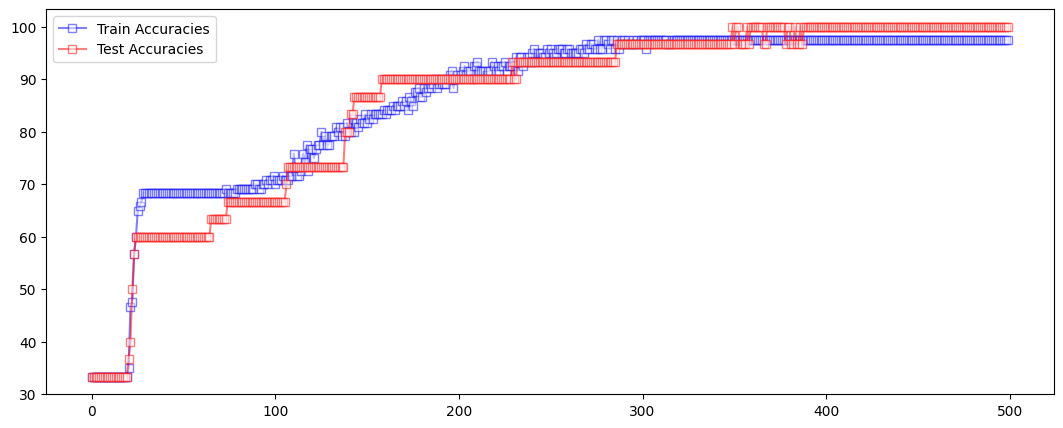

In [ ]:
plt.figure(figsize = (13,5))
plt.plot(train_accs, 'bs-', markerfacecolor = 'w', label='Train Accuracies', alpha=0.5)
plt.plot(test_accs, 'rs-', markerfacecolor='w', label = 'Test Accuracies', alpha=0.5)
plt.legend()
plt.show()

# Split into train, test, dev

## Data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# create fake dataset
fake_data = np.tile([1,2,3,4], (10,1)) + np.tile(10 * np.arange(1,11), (4,1)).T
fake_labels = np.arange(10)>4
fake_data, fake_labels

(array([[ 11,  12,  13,  14],
        [ 21,  22,  23,  24],
        [ 31,  32,  33,  34],
        [ 41,  42,  43,  44],
        [ 51,  52,  53,  54],
        [ 61,  62,  63,  64],
        [ 71,  72,  73,  74],
        [ 81,  82,  83,  84],
        [ 91,  92,  93,  94],
        [101, 102, 103, 104]]),
 array([False, False, False, False, False,  True,  True,  True,  True,
         True]))

## Split

In [ ]:
partitions = [.8, .1, .1]

train_data, test_tmp_data, train_labels, test_tmp_labels = \
train_test_split(fake_data, fake_labels, train_size = partitions[0])

# split the tmp data
split = partitions[1] / np.sum(partitions[1:])

devset_data, test_data, devset_labels, test_labels = \
train_test_split(test_tmp_data, test_tmp_labels, train_size = split)

In [ ]:
devset_data, devset_data.shape

(array([[81, 82, 83, 84]]), (1, 4))

In [ ]:
test_data, test_data.shape

(array([[41, 42, 43, 44]]), (1, 4))

In [ ]:
devset_labels, devset_labels.shape

(array([ True]), (1,))

In [ ]:
test_labels, test_labels.shape

(array([False]), (1,))

# Cross-validation on regression

## Raw

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

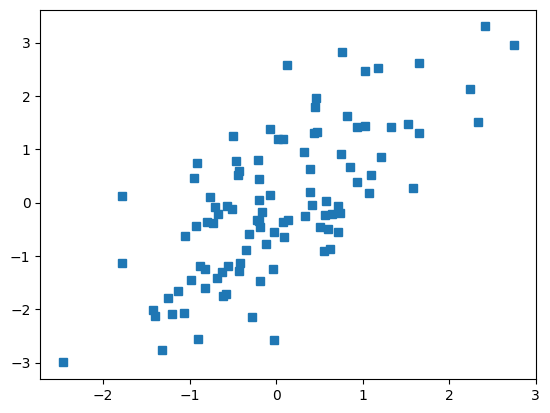

In [ ]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

plt.plot(x,y,'s')
plt.show()

In [ ]:
ann = nn.Sequential(
    nn.Linear(1,8),
    nn.ReLU(),
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

In [ ]:
lr = 1e-3

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(ann.parameters(), lr = lr)

In [ ]:
train_idx = np.random.choice(range(N), 80, replace = False)
train_bool = np.zeros(N, dtype=bool)
train_bool[train_idx] = True

print(x[train_bool].shape)
print(x[~train_bool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [ ]:
epochs = 1000
losses = torch.zeros(epochs)
accuracies = torch.zeros(epochs)

for epoch in range(epochs):
  y_hat = ann(x[train_bool])

  loss = loss_fn(y_hat, y[train_bool])
  losses[epoch] = loss
  accuracy = 100 * torch.mean(
      (torch.argmax(y_hat, axis = 1) == y[train_bool]).float()
  )
  accuracies[epoch] = accuracy

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # if epoch % 10 == 0:
  print(f'Epoch: {epoch}, Loss: {loss}')

Epoch: 0, Loss: 1.8310668468475342
Epoch: 1, Loss: 1.8302276134490967
Epoch: 2, Loss: 1.8293921947479248
Epoch: 3, Loss: 1.8285633325576782
Epoch: 4, Loss: 1.8277623653411865
Epoch: 5, Loss: 1.8269649744033813
Epoch: 6, Loss: 1.8261711597442627
Epoch: 7, Loss: 1.8253809213638306
Epoch: 8, Loss: 1.8245941400527954
Epoch: 9, Loss: 1.8238105773925781
Epoch: 10, Loss: 1.8230304718017578
Epoch: 11, Loss: 1.8222541809082031
Epoch: 12, Loss: 1.8214807510375977
Epoch: 13, Loss: 1.8207107782363892
Epoch: 14, Loss: 1.8199440240859985
Epoch: 15, Loss: 1.8191804885864258
Epoch: 16, Loss: 1.8184200525283813
Epoch: 17, Loss: 1.8176628351211548
Epoch: 18, Loss: 1.816908836364746
Epoch: 19, Loss: 1.8161576986312866
Epoch: 20, Loss: 1.8154098987579346
Epoch: 21, Loss: 1.8146648406982422
Epoch: 22, Loss: 1.8139231204986572
Epoch: 23, Loss: 1.8131840229034424
Epoch: 24, Loss: 1.812451720237732
Epoch: 25, Loss: 1.811741828918457
Epoch: 26, Loss: 1.8110347986221313
Epoch: 27, Loss: 1.8103303909301758
Epoch

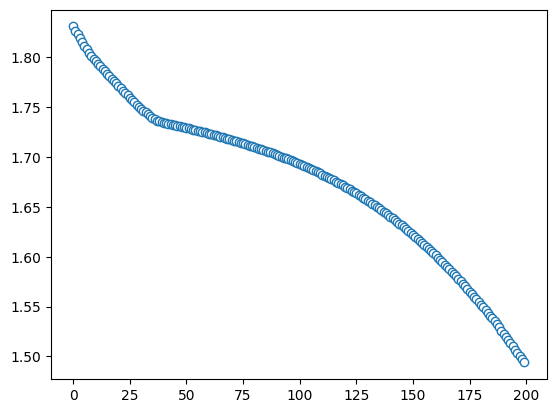

In [ ]:
plt.plot(losses[::5].detach(), 'o-', markerfacecolor='w')

In [ ]:
y_hat_test = ann(x[~train_bool])
loss_test = (y_hat_test - y[~train_bool]).pow(2).mean()

print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {loss_test.detach():.2f}')

Final TRAIN loss: 1.49
Final TEST loss: 1.99


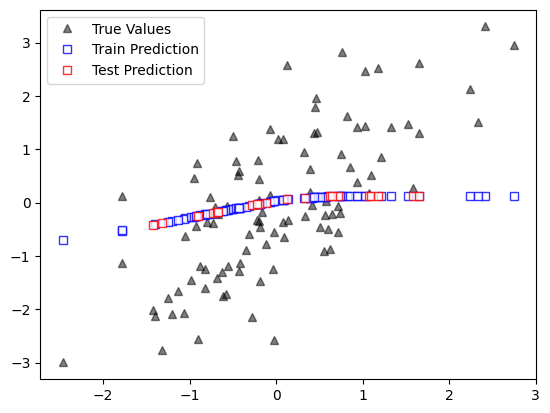

In [ ]:
### plot the data

# predictions for final training run
plt.plot(x, y, 'k^', alpha=.5)
plt.plot(x[train_bool].detach().numpy(), y_hat.detach().numpy(), 'bs', alpha=.8, markerfacecolor='w')
plt.plot(x[~train_bool].detach().numpy(), y_hat_test.detach().numpy(), 'rs', alpha=.8, markerfacecolor='w')
plt.legend(['True Values', 'Train Prediction', 'Test Prediction'])
plt.show()

## Sci-Kit

In [ ]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

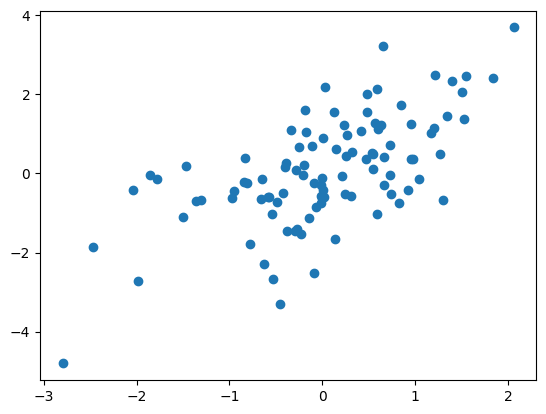

In [ ]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

plt.plot(x, y, 'o')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]))

In [ ]:
ann = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,4),
    nn.ReLU(),
    nn.Linear(4,1)
)

In [ ]:
epochs = 10000
lr = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(ann.parameters(), lr = lr)

In [ ]:
train_losses = torch.zeros(epochs)
test_losses = torch.zeros(epochs)

for epoch in range(epochs):
  train_y_hat = ann(X_train)
  train_loss = loss_fn(train_y_hat, y_train)
  train_losses[epoch] = train_loss


  test_y_hat = ann(X_test)
  test_loss = loss_fn(test_y_hat, y_test)
  test_losses[epoch] = test_loss


  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  if epoch%10 == 0:
    print(f'Epoch: {epoch}, Train Loss: {train_loss}, Test Loss: {test_loss}')

Epoch: 0, Train Loss: 2.0783305168151855, Test Loss: 1.0334880352020264
Epoch: 10, Train Loss: 2.0759117603302, Test Loss: 1.0354540348052979
Epoch: 20, Train Loss: 2.073587656021118, Test Loss: 1.037376046180725
Epoch: 30, Train Loss: 2.071384906768799, Test Loss: 1.039247989654541
Epoch: 40, Train Loss: 2.0692684650421143, Test Loss: 1.0410709381103516
Epoch: 50, Train Loss: 2.0672223567962646, Test Loss: 1.042842149734497
Epoch: 60, Train Loss: 2.0652613639831543, Test Loss: 1.0445672273635864
Epoch: 70, Train Loss: 2.063356876373291, Test Loss: 1.0462567806243896
Epoch: 80, Train Loss: 2.0615029335021973, Test Loss: 1.04789137840271
Epoch: 90, Train Loss: 2.0596933364868164, Test Loss: 1.0494697093963623
Epoch: 100, Train Loss: 2.057922840118408, Test Loss: 1.0509910583496094
Epoch: 110, Train Loss: 2.0561861991882324, Test Loss: 1.0524556636810303
Epoch: 120, Train Loss: 2.0544791221618652, Test Loss: 1.0538626909255981
Epoch: 130, Train Loss: 2.0527968406677246, Test Loss: 1.0552

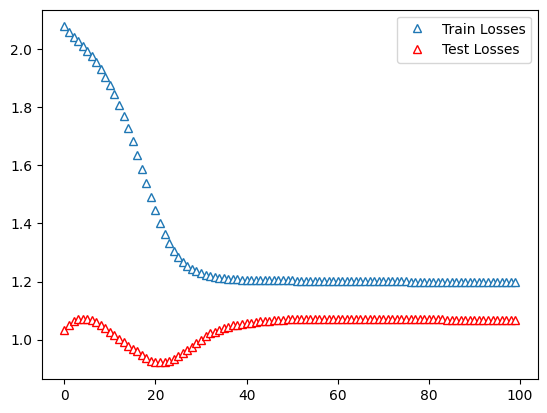

In [ ]:
plt.plot(train_losses.detach().numpy()[::100], '^', markerfacecolor='w')
plt.plot(test_losses.detach().numpy()[::100], 'r^', markerfacecolor='w')
plt.legend(['Train Losses', 'Test Losses'])
plt.show()

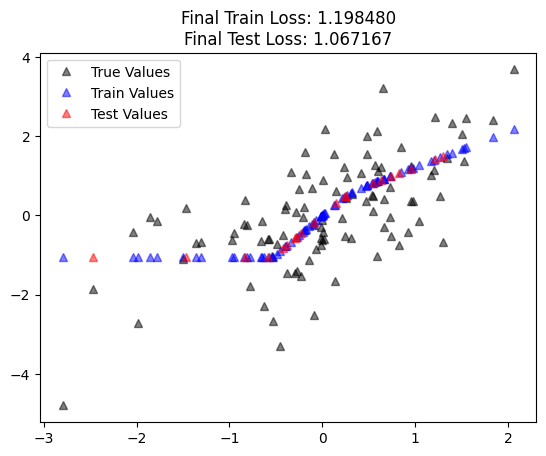

In [ ]:
plt.plot(x, y, 'k^', alpha=.5)
plt.plot(X_train, train_y_hat.detach(), 'b^', alpha=.5)
plt.plot(X_test, test_y_hat.detach(), 'r^', alpha=.5)
plt.legend(['True Values', 'Train Values', 'Test Values'])
plt.title(f'Final Train Loss: {train_losses[-1]:2f}\nFinal Test Loss: {test_losses[-1]:2f}')
plt.show()

## Sci-Kit + DataLoader

In [38]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

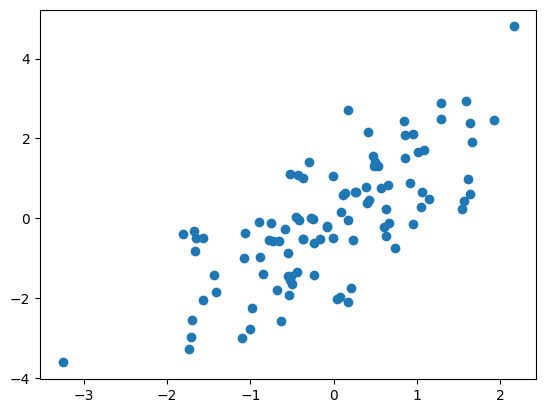

In [39]:
N = 100
x = np.random.randn(N,1).astype(float)
y = x + np.random.randn(N,1).astype(float)

plt.plot(x, y, 'o')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = .8)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_test.shape)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_dataloader = DataLoader(train_dataset, batch_size = 4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = 4)

X_train shape: (80, 1)
y_train shape: (80, 1)
X_test shape: (20, 1)
y_train shape: (20, 1)


In [41]:
ann = nn.Sequential(
    nn.Linear(1,4),
    nn.ReLU(),
    nn.Linear(4,1)
)

In [42]:
epochs = 500
lr = 1e-3
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(ann.parameters(), lr = lr)

In [43]:
train_losses = torch.zeros(epochs)
test_losses = torch.zeros(epochs)

for epoch in range(epochs):
  batch_losses = torch.zeros(len(train_dataloader))

  for batch, (X_train, y_train) in enumerate(train_dataloader):
    train_y_hat = ann(X_train)
    train_loss = loss_fn(train_y_hat, y_train)
    batch_losses[batch] = train_loss

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch%10 == 0 and batch%4 ==0:
      print(f'Epoch: {epoch}, Loss: {train_loss}')

  train_losses[epoch] = torch.mean(batch_losses)

  X_test, y_test = next(iter(test_dataloader))
  test_y_hat = ann(X_test)
  test_loss = loss_fn(test_y_hat, y_test)
  test_losses[epoch] = test_loss

Epoch: 0, Loss: 2.836433172225952
Epoch: 0, Loss: 2.7174301147460938
Epoch: 0, Loss: 1.5277868509292603
Epoch: 0, Loss: 2.0280182361602783
Epoch: 0, Loss: 4.23261833190918
Epoch: 10, Loss: 3.445333480834961
Epoch: 10, Loss: 3.3821136951446533
Epoch: 10, Loss: 4.840571403503418
Epoch: 10, Loss: 0.638378918170929
Epoch: 10, Loss: 2.332735776901245
Epoch: 20, Loss: 3.836325168609619
Epoch: 20, Loss: 3.710627555847168
Epoch: 20, Loss: 0.6647957563400269
Epoch: 20, Loss: 1.8462469577789307
Epoch: 20, Loss: 0.7767766118049622
Epoch: 30, Loss: 2.7691142559051514
Epoch: 30, Loss: 5.377347946166992
Epoch: 30, Loss: 1.6822549104690552
Epoch: 30, Loss: 3.5427846908569336
Epoch: 30, Loss: 3.0038206577301025
Epoch: 40, Loss: 4.862865924835205
Epoch: 40, Loss: 3.4624621868133545
Epoch: 40, Loss: 2.3322274684906006
Epoch: 40, Loss: 1.9537144899368286
Epoch: 40, Loss: 2.2384684085845947
Epoch: 50, Loss: 4.7496209144592285
Epoch: 50, Loss: 3.1175060272216797
Epoch: 50, Loss: 6.753026008605957
Epoch: 50

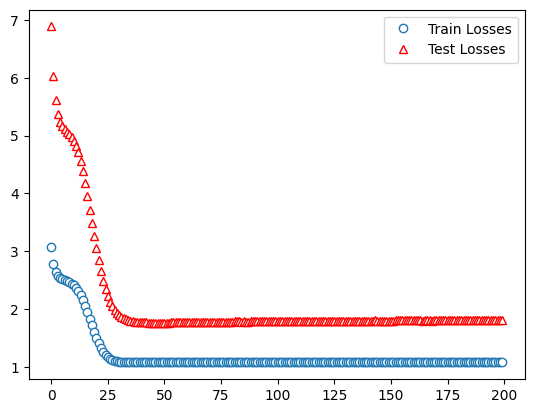

In [44]:
plt.plot(train_losses.detach()[::5], 'o', markerfacecolor='w')
plt.plot(test_losses.detach()[::5], 'r^', markerfacecolor='w')
plt.legend(['Train Losses', 'Test Losses'])
plt.show()